# Decision tree regressor from scratch

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree, export_graphviz
import graphviz
import sys
import dtreeviz
sys.path.insert(0, 'C:/Users/grzesiek/Documents/Data Science/PycharmProjects/ML_from_scratch/Decision_tree_regressor')

In [2]:
from decision_tree_reg import mse, accuracy, Node, DecisionTreeReg

In [3]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
X = X.flatten()
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

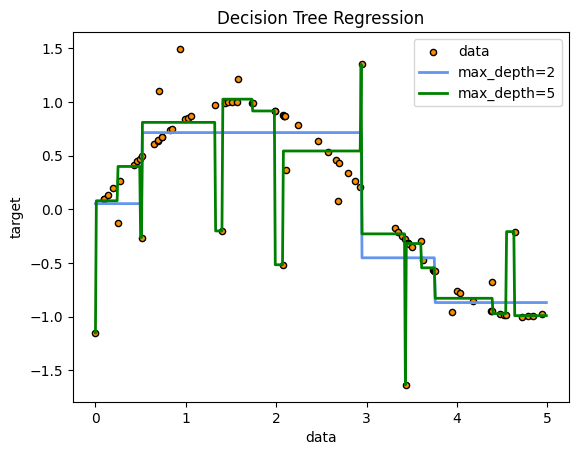

In [4]:
max_depth1, max_depth2 = 2, 5
min_MSE = 0.002
reg1 = DecisionTreeReg(max_depth=max_depth1, min_MSE=min_MSE)
reg1.fit(X, y)
reg2 = DecisionTreeReg(max_depth=max_depth2, min_MSE=min_MSE)
reg2.fit(X, y)

# Predict
y_test1 = reg1.predict(X_test)
y_test2 = reg2.predict(X_test)


# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_test1, color="cornflowerblue", label=f"max_depth={max_depth1}", linewidth=2)
plt.plot(X_test, y_test2, color="green", label=f"max_depth={max_depth2}", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Decision tree regressor form sklearn

In [6]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [8]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=max_depth1)
regr_2 = DecisionTreeRegressor(max_depth=max_depth2)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

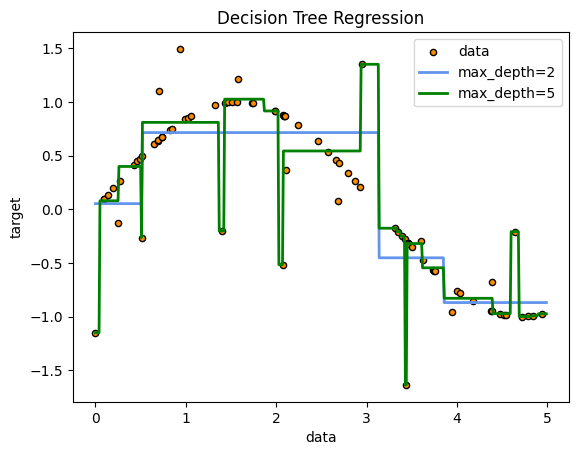

In [10]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="green", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## dtreeviz 

In [14]:
viz_rmodel = dtreeviz.model(model=regr_1, 
                            X_train=X, 
                            y_train=y, 
                            feature_names='x', 
                            target_name='y')

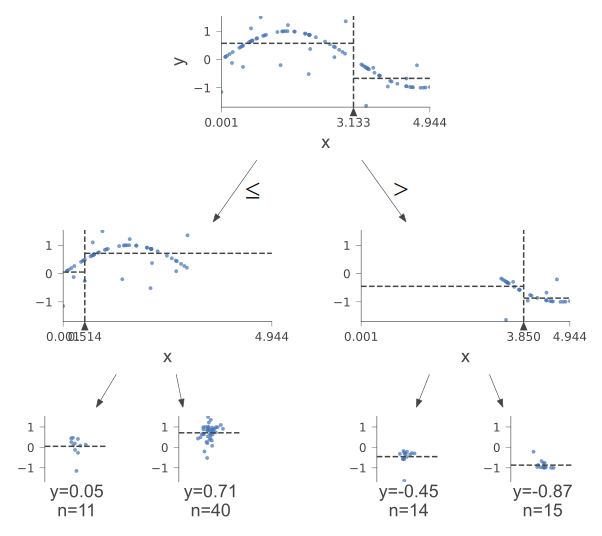

In [16]:
viz_rmodel.view(scale=2)

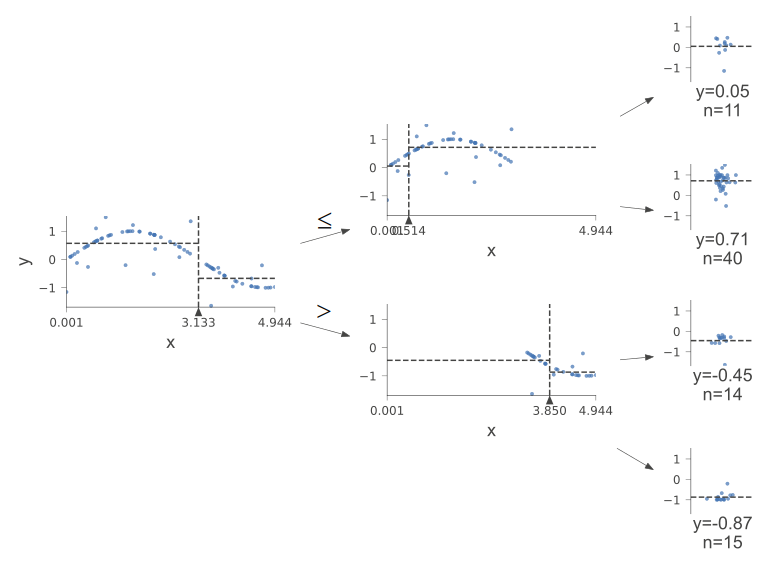

In [18]:
viz_rmodel.view(orientation="LR", scale=2)



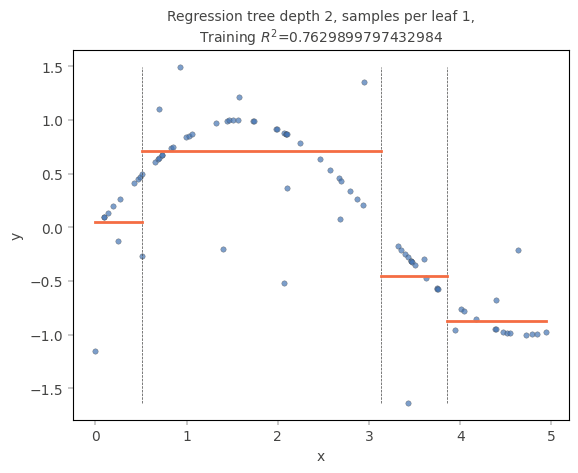

In [20]:
viz_rmodel.rtree_feature_space()

## 3d example

In [22]:
dataset_url = "https://raw.githubusercontent.com/parrt/dtreeviz/master/data/cars.csv"
df_cars = pd.read_csv(dataset_url)
X = df_cars[["WGT", "ENG"]]
y = df_cars['MPG']
dtr_bivar_3d = DecisionTreeRegressor(max_depth=3, criterion="absolute_error")
dtr_bivar_3d.fit(X.values, y.values)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3)

In [23]:
viz_rmodel = dtreeviz.model(dtr_bivar_3d, X, y,
                           feature_names=["WGT", "ENG"],
                           target_name='MPG')

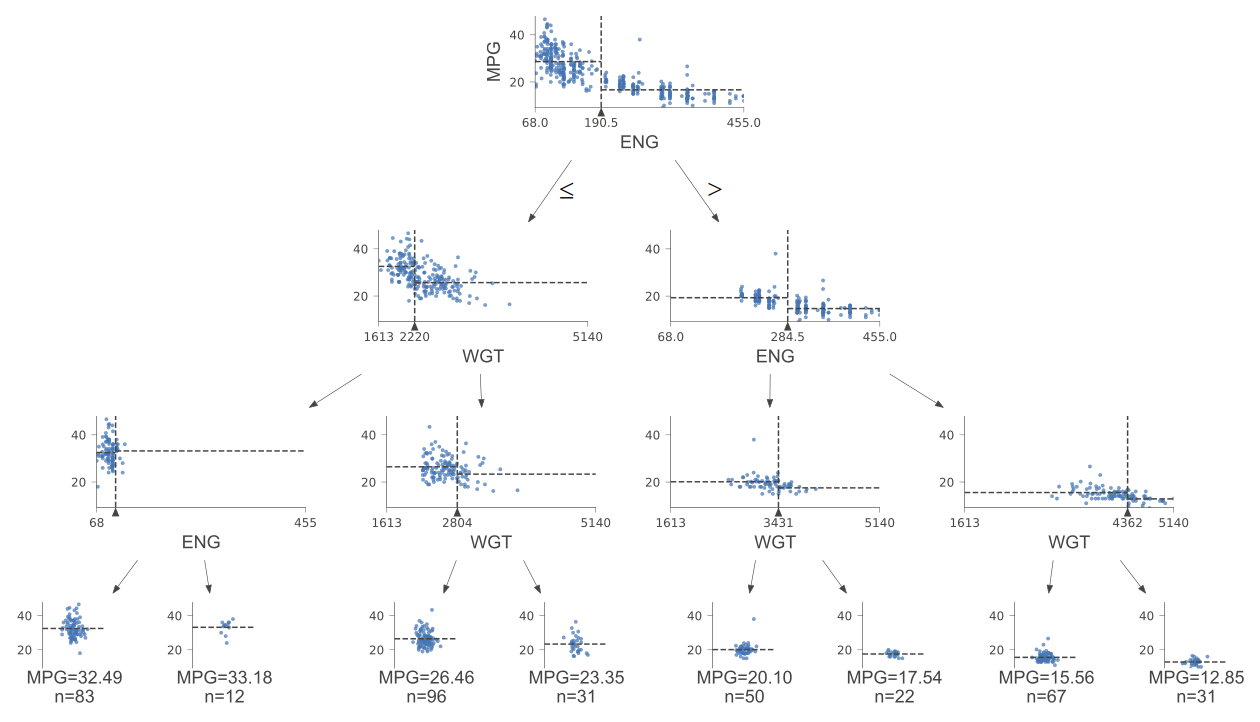

In [24]:
viz_rmodel.view(scale=2)

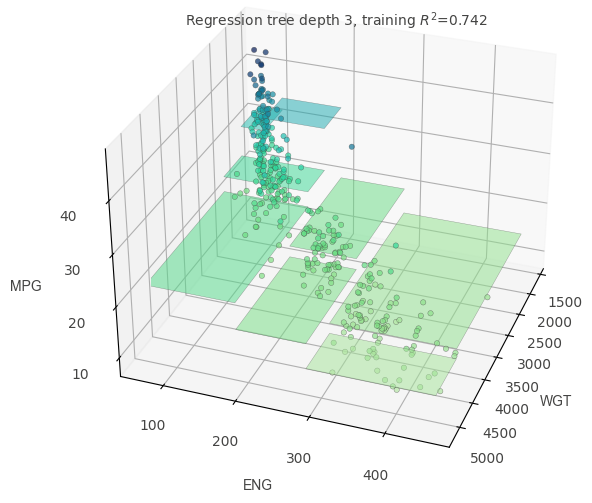

In [25]:
viz_rmodel.rtree_feature_space3D(fontsize=10,
                        elev=30, azim=20, 
                        show={'splits','title'},
                        colors={'tesselation_alpha':.5})

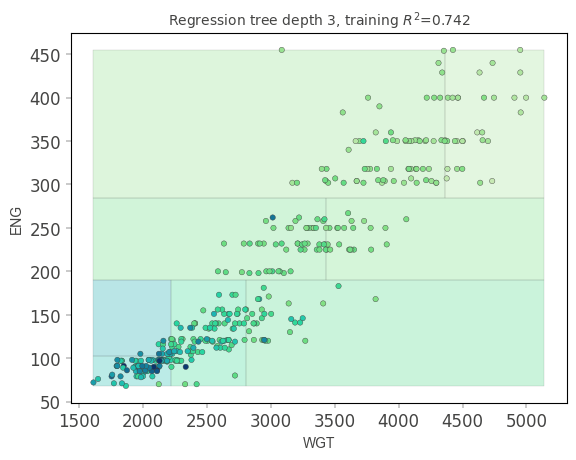

In [26]:
viz_rmodel.rtree_feature_space()